In [1]:
import feature_extraction
import random
import tensorflow as tf
import os
import pandas as pd
from PIL import Image
import numpy as np


IMG_SIZE = (256, 256)
vectors_from_single_word=200


In [2]:
word_vec_dictionary=feature_extraction.get_wordEmbeddingDictionary()
all_classes= list(word_vec_dictionary.keys())
#seen_keys= random.choices(all_classes,k=20)
#unseen_keys= list(set(all_classes).difference(seen_keys))
seen_keys=feature_extraction.get_entities_in_file_line("trainclasses.txt")
unseen_keys=feature_extraction.get_entities_in_file_line("testclasses.txt")
print(seen_keys)
print(unseen_keys)


['antelope', 'grizzly+bear', 'killer+whale', 'beaver', 'dalmatian', 'horse', 'german+shepherd', 'blue+whale', 'siamese+cat', 'skunk', 'mole', 'tiger', 'moose', 'spider+monkey', 'elephant', 'gorilla', 'ox', 'fox', 'sheep', 'hamster', 'squirrel', 'rhinoceros', 'rabbit', 'bat', 'giraffe', 'wolf', 'chihuahua', 'weasel', 'otter', 'buffalo', 'zebra', 'deer', 'bobcat', 'lion', 'mouse', 'polar+bear', 'collie', 'walrus', 'cow', 'dolphin']
['chimpanzee', 'giant+panda', 'leopard', 'persian+cat', 'pig', 'hippopotamus', 'humpback+whale', 'raccoon', 'rat', 'seal']


In [3]:
min_class= 10000
for key in seen_keys:
    files = os.listdir("JPEGImages\\"+key)
    print(key+":"+str(len(files)))
    if(len(files)<min_class):
        min_class=len(files)
print(min_class)




antelope:1046
grizzly+bear:852
killer+whale:291
beaver:193
dalmatian:549
horse:1645
german+shepherd:1033
blue+whale:174
siamese+cat:500
skunk:188
mole:100
tiger:877
moose:704
spider+monkey:291
elephant:1038
gorilla:872
ox:728
fox:664
sheep:1420
hamster:779
squirrel:1200
rhinoceros:696
rabbit:1088
bat:383
giraffe:1202
wolf:589
chihuahua:567
weasel:272
otter:758
buffalo:895
zebra:1170
deer:1344
bobcat:630
lion:1019
mouse:185
polar+bear:868
collie:1028
walrus:215
cow:1338
dolphin:946
100


In [4]:
feature_extractor_model=feature_extraction.instantiate_model()
IDs=[]
Feature_vectors=[]
feature_extracting_batch_size=16
for key in seen_keys:
    files = os.listdir("JPEGImages\\"+key)
    #input_arr= np.array()
    input_arr=[]
    batch_counter=0
    min_counter=0
    for file in files:
        batch_counter+=1
        min_counter+=1
        id= all_classes.index(key)
        IDs.append(id)
        image= tf.keras.preprocessing.image.load_img(path="JPEGImages\\"+key+"\\"+file,grayscale=False,color_mode="rgb",target_size=IMG_SIZE,interpolation='nearest')
        input=tf.keras.preprocessing.image.img_to_array(image)
        input=input/255.0
        input_arr.append(input)
        if(batch_counter%feature_extracting_batch_size==0):
            input_model= np.array(input_arr)
            features= feature_extractor_model.predict(input_model)
            for vector in features:
                Feature_vectors.append(vector)

            batch_counter=0
            input_arr=[]
        if(min_counter==vectors_from_single_word):
            break
    if(len(input_arr)>0):
        input_model= np.array(input_arr)
        features= feature_extractor_model.predict(input_model)
        for vector in features:
            Feature_vectors.append(vector)  
    print(key)
    





1/1 [==============================] - 0s 130ms/step
antelope
1/1 [==============================] - 0s 26ms/step
grizzly+bear
1/1 [==============================] - 0s 26ms/step
killer+whale
1/1 [==============================] - 0s 93ms/step
beaver
1/1 [==============================] - 0s 26ms/step
dalmatian
1/1 [==============================] - 0s 32ms/step
horse
1/1 [==============================] - 0s 28ms/step
german+shepherd
1/1 [==============================] - 0s 163ms/step
blue+whale
1/1 [==============================] - 0s 26ms/step
siamese+cat
1/1 [==============================] - 0s 134ms/step
skunk
1/1 [==============================] - 0s 91ms/step
mole
1/1 [==============================] - 0s 26ms/step
tiger
1/1 [==============================] - 0s 26ms/step
moose
1/1 [==============================] - 0s 26ms/step
spider+monkey
1/1 [==============================] - 0s 25ms/step
elephant
1/1 [==============================] - 0s 26ms/step
gorilla
1/1 [=========

In [5]:
print(len(IDs))
print(len(Feature_vectors))

7840
7840


In [6]:
ontologyIDsAllClasses=[]
ontology_vectors_and_noiseAllClasses=[]

for i in range(vectors_from_single_word):
    for key, vector in word_vec_dictionary.items():
        id= all_classes.index(key)
        s= np.random.normal(0,1,100)
        datasample= np.concatenate((vector,s),axis=0)
        ontologyIDsAllClasses.append(id)
        ontology_vectors_and_noiseAllClasses.append(datasample)
ontologyIDsSeen=[]
ontology_vectors_and_noiseSeen=[]
for i in range(vectors_from_single_word):
    for key in seen_keys:
        id= all_classes.index(key)
        s= np.random.normal(0,1,100)
        vector= word_vec_dictionary[key]
        datasample= np.concatenate((vector,s),axis=0)
        ontologyIDsSeen.append(id)
        ontology_vectors_and_noiseSeen.append(datasample)
ontology_vectors_and_noiseAllClasses= np.array(ontology_vectors_and_noiseAllClasses)            
ontology_vectors_and_noiseSeen= np.array(ontology_vectors_and_noiseSeen)       
print(ontology_vectors_and_noiseSeen.shape) 
    

(8000, 200)


In [7]:
# Feature_vectors= np.array(Feature_vectors)
# Feature_vectors_shuffled= np.copy(Feature_vectors)
# np.random.shuffle(Feature_vectors_shuffled)

# ontology_vectors_and_noiseSeen_shuffled= np.copy(ontology_vectors_and_noiseSeen) 
# np.random.shuffle(ontology_vectors_and_noiseSeen_shuffled)

from sklearn.model_selection import train_test_split

x =np.array( Feature_vectors)
y= np.array(IDs)

x_train,x_test,y_train, y_test= train_test_split(x, y,test_size=0.20,random_state=42)

classifier_to_gan_training=feature_extraction.classifier_model(len(all_classes))
classifier_to_gan_training.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])


In [8]:
r_gan_training=classifier_to_gan_training.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=25)

Epoch 1/25
196/196 [==============================] - 1s 6ms/step - loss: 0.8707 - accuracy: 0.7811 - val_loss: 0.6338 - val_accuracy: 0.8221
Epoch 2/25
196/196 [==============================] - 1s 5ms/step - loss: 0.2503 - accuracy: 0.9260 - val_loss: 0.6205 - val_accuracy: 0.8374
Epoch 3/25
196/196 [==============================] - 1s 4ms/step - loss: 0.1164 - accuracy: 0.9657 - val_loss: 0.7448 - val_accuracy: 0.8406
Epoch 4/25
196/196 [==============================] - 1s 3ms/step - loss: 0.0670 - accuracy: 0.9833 - val_loss: 0.6264 - val_accuracy: 0.8654
Epoch 5/25
196/196 [==============================] - 1s 3ms/step - loss: 0.0536 - accuracy: 0.9829 - val_loss: 0.7281 - val_accuracy: 0.8374
Epoch 6/25
196/196 [==============================] - 1s 3ms/step - loss: 0.0439 - accuracy: 0.9877 - val_loss: 0.7040 - val_accuracy: 0.8489
Epoch 7/25
196/196 [==============================] - 1s 3ms/step - loss: 0.0163 - accuracy: 0.9960 - val_loss: 0.6631 - val_accuracy: 0.8724
Epoch 

In [9]:
#image= tf.keras.preprocessing.image.load_img(path="JPEGImages\\"+"bat"+"\\"+"bat_10001.jpg",grayscale=False,color_mode="rgb",target_size=IMG_SIZE,interpolation='nearest')
image= tf.keras.preprocessing.image.load_img(path="JPEGImages\\"+"deer"+"\\"+"deer_10001.jpg",grayscale=False,color_mode="rgb",target_size=IMG_SIZE,interpolation='nearest')
#image= tf.keras.preprocessing.image.load_img(path="JPEGImages\\"+"dolphin"+"\\"+"dolphin_10001.jpg",grayscale=False,color_mode="rgb",target_size=IMG_SIZE,interpolation='nearest')
input=tf.keras.preprocessing.image.img_to_array(image)
input=input/255.0
features=feature_extractor_model.predict(np.array([input]))
result=classifier_to_gan_training.predict(features)
predicted= np.argmax( result[0])

print(all_classes[predicted])

1/1 [==============================] - 0s 32ms/step
deer


In [10]:
import gan

#Feature_vectors= np.array(Feature_vectors)
#np.random.shuffle(Feature_vectors)

#np.random.shuffle(ontology_vectors_and_noiseSeen)
generator= gan.make_generator_model()

noise= tf.random.normal([1,200])
#print(ontology_vectors_and_noiseSeen.shape)

generated_feature= generator(noise,training=False)
print(generated_feature)

tf.Tensor(
[[-0.02475921 -0.16146046  0.04133919 ...  0.10720164  0.19584265
   0.4926628 ]], shape=(1, 2048), dtype=float32)


In [11]:
from sklearn.utils import shuffle
x =np.array( ontology_vectors_and_noiseSeen)
y= np.array(ontologyIDsSeen)
print(x.shape)
print(y.shape)
x_train,y_train= shuffle(x, y,random_state=42)

y_train_one_hot=np.zeros((y_train.shape[0],len(all_classes)))
for i in range(y_train.shape[0]):
    y_train_one_hot[i][y_train[i]]=1
print(y_train_one_hot[1])

(8000, 200)
(8000,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [12]:
batch_size=25
roundedCounter= int( x_train.shape[0]/batch_size)
print(roundedCounter)
print(x_train[:roundedCounter*batch_size].shape)
x_train_batches=np.split(x_train[:roundedCounter*batch_size],roundedCounter,axis=0)
x_train_batches=np.array(x_train_batches)
print(x_train_batches.shape)
print(x_train_batches[0])

y_train_batches=np.split(y_train[:roundedCounter*batch_size],roundedCounter,axis=0)
y_train_batches=np.array(y_train_batches)
print(y_train_batches.shape)
print(y_train_batches[0])

320
(8000, 200)
(320, 25, 200)
[[-0.02218817 -0.04313019 -0.0202945  ...  0.49083777  2.72656858
  -0.06585252]
 [ 0.05913923  0.00513702 -0.10369438 ...  0.65586495  0.24231321
  -1.65091276]
 [ 0.05913923  0.00513702 -0.10369438 ... -0.28729649 -0.29300612
   0.67956148]
 ...
 [-0.00776864  0.09464271 -0.05360352 ...  0.36108625  0.04434965
   1.042594  ]
 [ 0.05296849 -0.08203439 -0.03042107 ... -1.24728164 -0.56362065
   0.57292728]
 [-0.10697171 -0.14743182 -0.16344801 ...  0.30959007 -0.6945432
   0.67781952]]
(320, 25)
[18 35 35 47  1  0 22  2 13 19 18 17 47 45 35 17 38 46 30 35 28  8 45  8
 29]


In [13]:
# batch_size=25

# print(Feature_vectors_shuffled.shape)
# Feature_vectors_shuffled=np.reshape(Feature_vectors_shuffled,(Feature_vectors.shape[0],2048))
# #Feature_vectors.reshape((1170,2048))
# print(Feature_vectors_shuffled.shape)
# Feature_vectors_batches= np.split(Feature_vectors_shuffled,min_class/batch_size*len(seen_keys),axis=0)
# Feature_vectors_batches=np.array(Feature_vectors_batches)
# print(Feature_vectors_batches.shape)

# ontology_vectors_and_noiseSeen_batches=np.split(ontology_vectors_and_noiseSeen_shuffled,min_class/batch_size*len(seen_keys),axis=0)
# ontology_vectors_and_noiseSeen_batches=np.array(ontology_vectors_and_noiseSeen_batches)
# print(ontology_vectors_and_noiseSeen_batches.shape)
# print(ontology_vectors_and_noiseSeen_batches[0])

In [14]:
# discriminator = gan.make_discriminator_model()
# decision= discriminator(generated_feature)
# print(decision)

In [15]:
generator_optimizer=tf.keras.optimizers.Adam(5e-5)
#discriminator_optimizer=tf.keras.optimizers.Adam(5e-5)

In [16]:
checkpoint_dir='./training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
#checkpoint= tf.train.Checkpoint(generator_optimizer=generator_optimizer, discriminator_optimizer=discriminator_optimizer,generator=generator,discriminator=discriminator)
checkpoint= tf.train.Checkpoint(generator_optimizer=generator_optimizer, generator=generator)

In [17]:
EPOCHS = 30
#gan.train(Feature_vectors_batches,ontology_vectors_and_noiseSeen_batches,EPOCHS,generator,discriminator,generator_optimizer,discriminator_optimizer,checkpoint,checkpoint_prefix)
gan.train(x_train_batches,EPOCHS,generator,classifier_to_gan_training,y_train_batches,generator_optimizer,checkpoint,checkpoint_prefix)

Time for epoch 1 is 1.1479203701019287 sec
Generator loss: 0.14359891414642334 
Time for epoch 2 is 0.8011808395385742 sec
Generator loss: 0.02594100497663021 
Time for epoch 3 is 0.8087821006774902 sec
Generator loss: 0.013216473162174225 
Time for epoch 4 is 0.8131840229034424 sec
Generator loss: 0.008106586523354053 
Time for epoch 5 is 0.8071823120117188 sec
Generator loss: 0.005454887170344591 
Time for epoch 6 is 0.8355681896209717 sec
Generator loss: 0.0038854109589010477 
Time for epoch 7 is 0.8281145095825195 sec
Generator loss: 0.0028700351249426603 
Time for epoch 8 is 0.8537328243255615 sec
Generator loss: 0.0021825931034982204 
Time for epoch 9 is 0.8491442203521729 sec
Generator loss: 0.0016948336269706488 
Time for epoch 10 is 0.8451910018920898 sec
Generator loss: 0.0013351060915738344 
Time for epoch 11 is 0.8658084869384766 sec
Generator loss: 0.0010657149832695723 
Time for epoch 12 is 0.9058763980865479 sec
Generator loss: 0.0008591560181230307 
Time for epoch 13 is

In [18]:
#training_data=generator(ontology_vectors_and_noiseAllClasses,training=False)
training_data=generator.predict(ontology_vectors_and_noiseAllClasses)
print(training_data.shape)
print(training_data[0])

313/313 [==============================] - 0s 711us/step
(10000, 2048)
[ 0.34510553  0.43372527 -0.20083329 ...  0.44272742  0.0671328
  0.5121011 ]


In [22]:
classifier=feature_extraction.classifier_model(len(all_classes))
classifier.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])


In [23]:
ontologyIDsAllClasses= np.array(ontologyIDsAllClasses)
x_train,x_test,y_train, y_test= train_test_split(training_data, ontologyIDsAllClasses,test_size=0.20,random_state=42)

In [24]:
r=classifier.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30)

Epoch 1/30
250/250 [==============================] - 2s 5ms/step - loss: 1.2868 - accuracy: 0.7696 - val_loss: 0.1048 - val_accuracy: 0.9995
Epoch 2/30
250/250 [==============================] - 1s 3ms/step - loss: 0.0373 - accuracy: 1.0000 - val_loss: 0.0259 - val_accuracy: 1.0000
Epoch 3/30
250/250 [==============================] - 1s 3ms/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 4/30
250/250 [==============================] - 1s 4ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 5/30
250/250 [==============================] - 1s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 6/30
250/250 [==============================] - 1s 3ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 7/30
250/250 [==============================] - 1s 4ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 

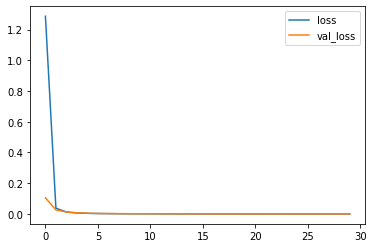

In [25]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

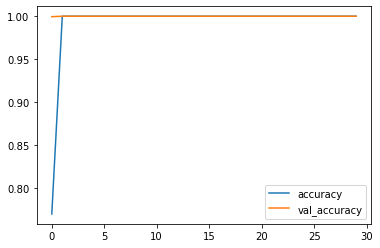

In [26]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [27]:
IDs=[]
Feature_vectors=[]
for key in all_classes:
    files = os.listdir("JPEGImages\\"+key)
    input_arr=[]

    for i in range(100):
        id= all_classes.index(key)
        IDs.append(id)
        image= tf.keras.preprocessing.image.load_img(path="JPEGImages\\"+key+"\\"+files[i],grayscale=False,color_mode="rgb",target_size=IMG_SIZE,interpolation='nearest')
        input=tf.keras.preprocessing.image.img_to_array(image)
        input=input/255.0
        input_arr.append(input)
    if(len(input_arr)>0):
        input_model= np.array(input_arr)
        features= feature_extractor_model.predict(input_model)
        for vector in features:
            Feature_vectors.append(vector)  
    print(key)
    

4/4 [==============================] - 1s 72ms/step
antelope
4/4 [==============================] - 0s 98ms/step
bat
4/4 [==============================] - 0s 97ms/step
beaver
4/4 [==============================] - 0s 97ms/step
blue+whale
4/4 [==============================] - 0s 97ms/step
bobcat
4/4 [==============================] - 0s 97ms/step
buffalo
4/4 [==============================] - 0s 96ms/step
chihuahua
4/4 [==============================] - 0s 96ms/step
chimpanzee
4/4 [==============================] - 0s 96ms/step
collie
4/4 [==============================] - 0s 95ms/step
cow
4/4 [==============================] - 0s 95ms/step
dalmatian
4/4 [==============================] - 0s 95ms/step
deer
4/4 [==============================] - 0s 96ms/step
dolphin
4/4 [==============================] - 0s 95ms/step
elephant
4/4 [==============================] - 0s 96ms/step
fox
4/4 [==============================] - 0s 99ms/step
german+shepherd
4/4 [==============================] -

In [36]:
X= np.array(Feature_vectors)
print(X.shape)
y= classifier.predict(X)
print(y.shape)
count_correct=0
predicted_array=[]
truth_array=[]
for i in range(y.shape[0]):
    predicted= np.argmax( y[i])
    predicted_array.append(predicted)
    truth= IDs[i]
    truth_array.append(truth)
    if(predicted==truth):
        count_correct+=1
print(count_correct)
print("Accuracy: {}".format(count_correct/(y.shape[0])))

(5000, 2048)
157/157 [==============================] - 0s 2ms/step
(5000, 50)
2670
Accuracy: 0.534


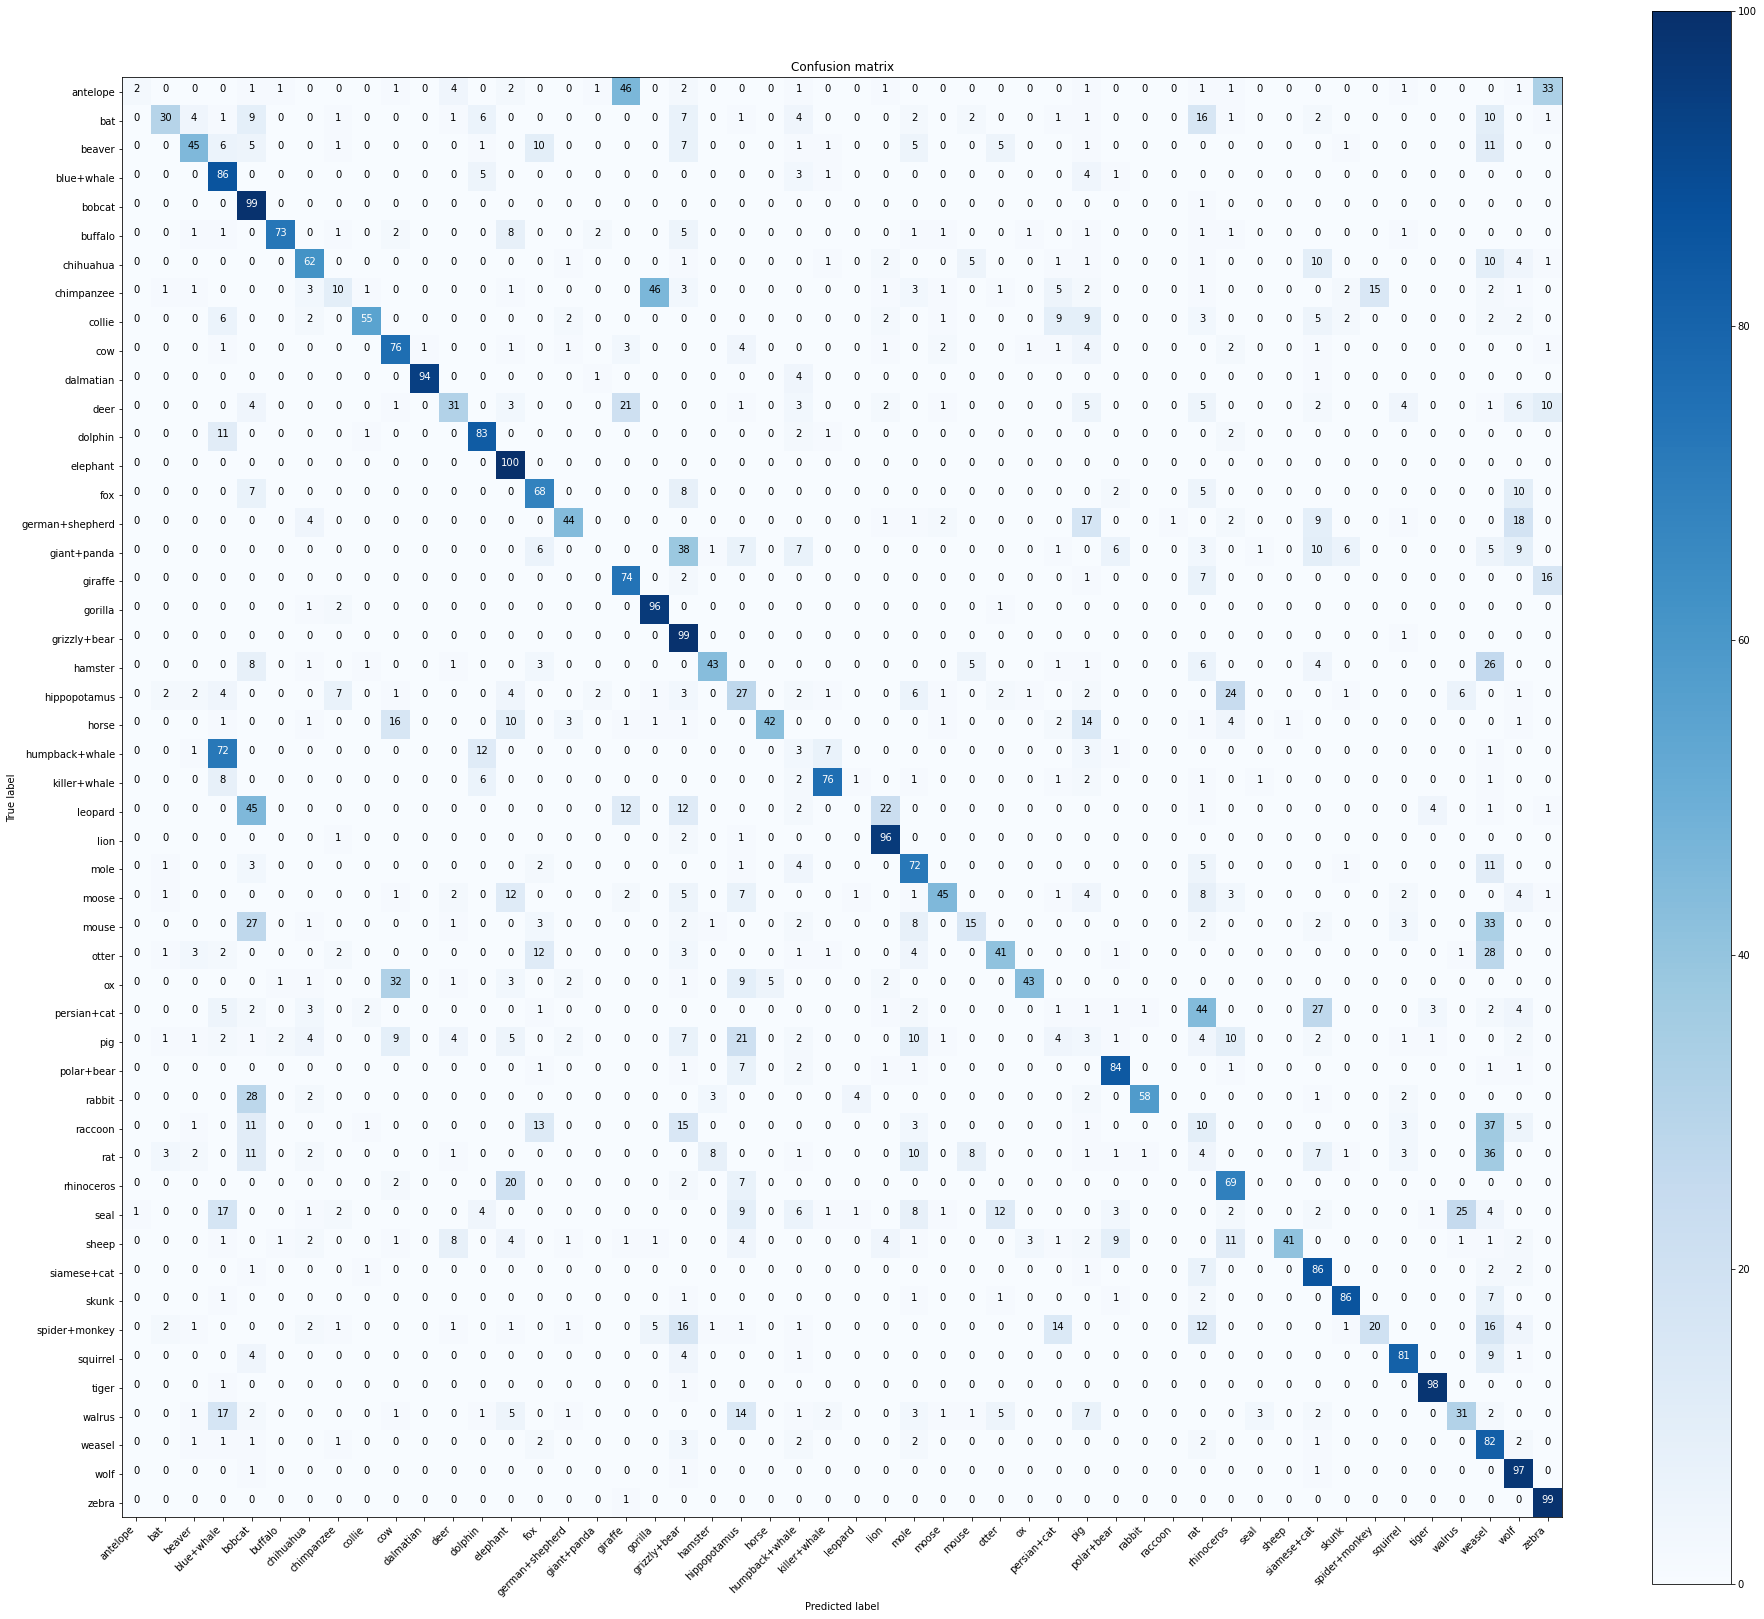

In [29]:
from sklearn import metrics
confusion_matrix= metrics.confusion_matrix(truth_array,predicted_array)
feature_extraction.plot_confusion_matrix(confusion_matrix,all_classes)
#cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = all_classes)

In [37]:
X= np.array(Feature_vectors)
print(X.shape)
y_trainer= classifier_to_gan_training.predict(X)
print(y_trainer.shape)
count_correct=0
predicted_array_trainer=[]
truth_array_trainer=[]
for i in range(y_trainer.shape[0]):
    predicted= np.argmax( y_trainer[i])
    predicted_array_trainer.append(predicted)
    truth= IDs[i]
    truth_array_trainer.append(truth)
    if(predicted==truth):
        count_correct+=1
print(count_correct)
print("Accuracy: {}".format(count_correct/(y_trainer.shape[0])))

(5000, 2048)
157/157 [==============================] - 0s 2ms/step
(5000, 50)
3778
Accuracy: 0.7556


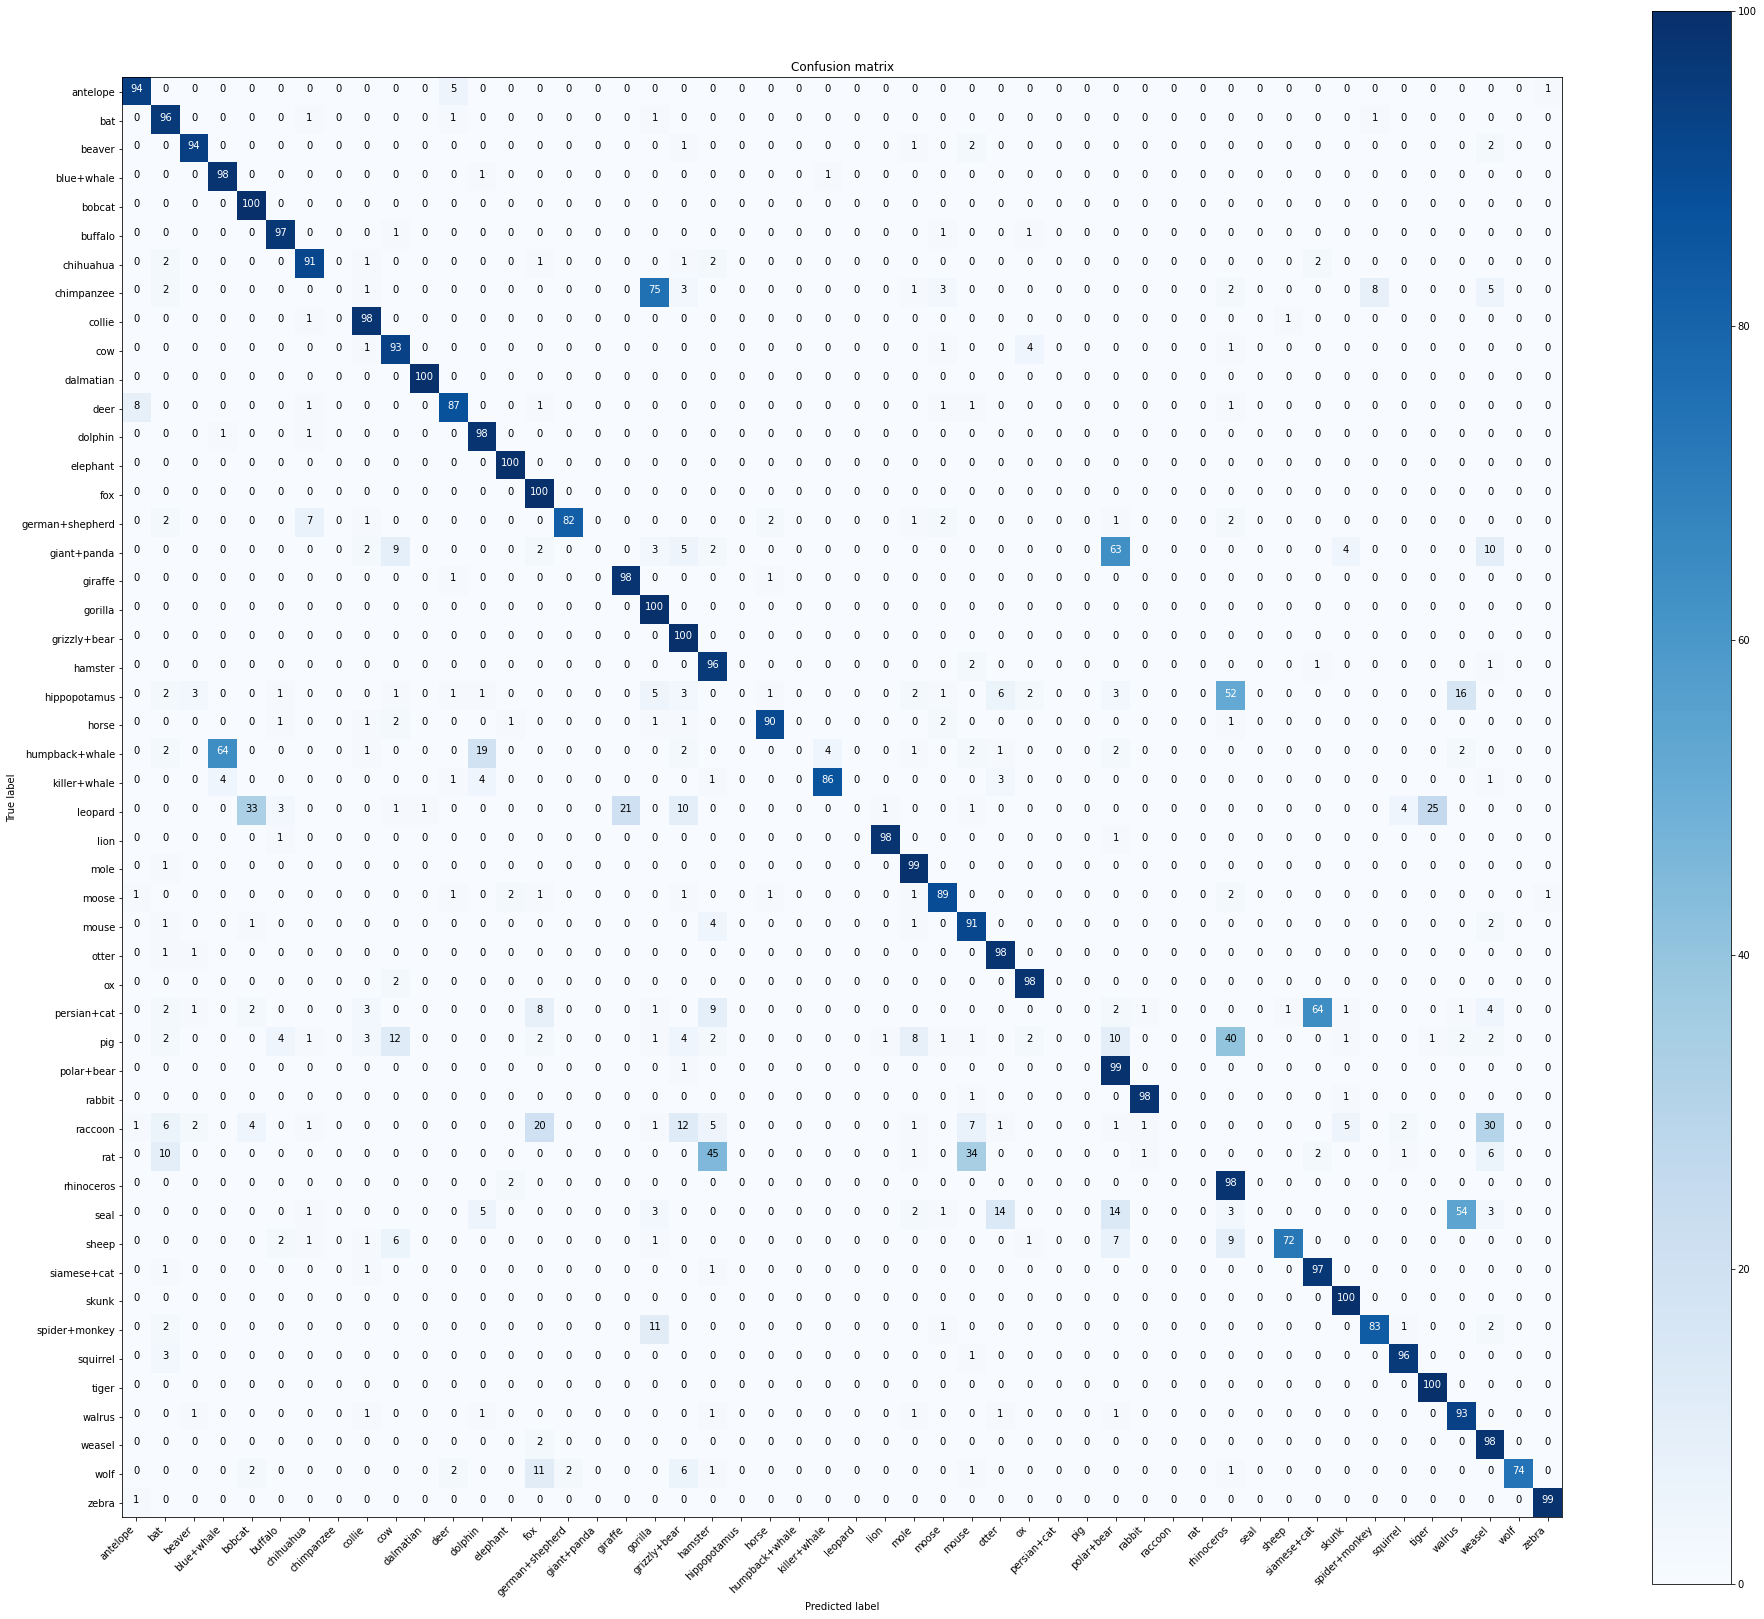

In [31]:
confusion_matrix= metrics.confusion_matrix(truth_array_trainer,predicted_array_trainer)
feature_extraction.plot_confusion_matrix(confusion_matrix,all_classes)